In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
#from nglview.player import TrajectoryPlayer
import os

In [12]:
font = {'family' : 'dejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}
COLOR = 'black'
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

mpl.rc('font', **font)

In [13]:
datdir = 'cpu_500ns/rawdata/rawdat_338e6'
rmsd3h = np.loadtxt(datdir + '/rmsd3h.dat'); rmsd3l = np.loadtxt(datdir + '/rmsd3l.dat')
rmsd2h = np.loadtxt(datdir + '/rmsd2h.dat'); rmsd2l = np.loadtxt(datdir + '/rmsd2l.dat')
rmsd1h = np.loadtxt(datdir + '/rmsd1h.dat'); rmsd1l = np.loadtxt(datdir + '/rmsd1l.dat')

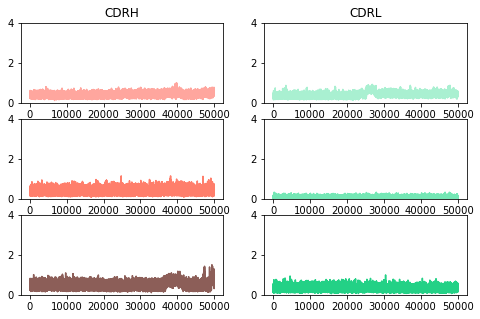

In [15]:
fig, ax = pl.subplots(3, 2,squeeze=False,figsize=(8,5))
ax[0,0].set_ylim([0,4]);ax[0,1].set_ylim([0,4]);ax[1,0].set_ylim([0,4]);ax[1,1].set_ylim([0,4])
ax[2,0].set_ylim([0,4]);ax[2,1].set_ylim([0,4.0])
ax[0,0].plot(rmsd3h*10,'#FFA69E')
ax[0,1].plot(rmsd3l*10,'#A9F0D1')
ax[1,0].plot(rmsd2h*10,'#FF7E6B')
ax[1,1].plot(rmsd2l*10,'#74E7B5')
ax[2,0].plot(rmsd1h*10,'#8C5E58')
ax[2,1].plot(rmsd1l*10,'#23D186')
ax[0,0].set_title('CDRH')
ax[0,1].set_title('CDRL')
fig.savefig('338e6.pdf',format='pdf')

# Alright now look at RMSF
## I think that the mdtraj rmsf atom_indices feature either has a bug or I'm not using it right.

## The documentation sucks, so just calculate the full RMSF (in nm) for all atoms and select subsets after

In [17]:
datdir = 'cpu_500ns/rawdata/rawdat_338e6'
rmsf3h = np.loadtxt(datdir + '/rmsf3h.dat'); rmsf3l = np.loadtxt(datdir + '/rmsf3l.dat')
rmsf2h = np.loadtxt(datdir + '/rmsf2h.dat'); rmsf2l = np.loadtxt(datdir + '/rmsf2l.dat')
rmsf1h = np.loadtxt(datdir + '/rmsf1h.dat'); rmsf1l = np.loadtxt(datdir + '/rmsf1l.dat')

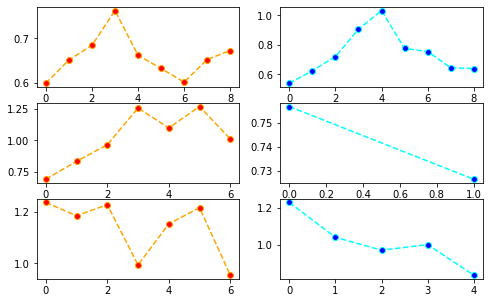

In [18]:
fig, ax = pl.subplots(3, 2,squeeze=False,figsize=(8,5))

ax[0,0].plot(rmsf3h*10,color='orange', linestyle='dashed', marker='o',markerfacecolor='red')
ax[1,0].plot(rmsf2h*10,color='orange', linestyle='dashed', marker='o',markerfacecolor='red')
ax[2,0].plot(rmsf1h*10,color='orange', linestyle='dashed', marker='o',markerfacecolor='red')
ax[0,1].plot(rmsf3l*10,color='cyan', linestyle='dashed', marker='o',markerfacecolor='blue')
ax[1,1].plot(rmsf2l*10,color='cyan', linestyle='dashed', marker='o',markerfacecolor='blue')
ax[2,1].plot(rmsf1l*10,color='cyan', linestyle='dashed', marker='o',markerfacecolor='blue')

fig.savefig('338e6_rmsf.pdf',format='pdf')

In [15]:
a = 0
dir1 = '/project2/ejadams/boughter/fab_sims/marta_fabs/'
dir2_1 = '/amber/sample_dcds/'
dir2_2 = '/amber2/sample_dcds/'
#i = 'rmsf_all.dat'

for i in ['rmsf1h.dat','rmsf2h.dat','rmsf3h.dat','rmsf3l.dat','rmsf2l.dat','rmsf1l.dat']:
    if i == 'rmsf1h.dat':
        name = ['CDR1H']
    if i == 'rmsf2h.dat':
        name = ['CDR2H']
    if i == 'rmsf3h.dat':
        name = ['CDR3H']
    if i == 'rmsf3l.dat':
        name = ['CDR3L']
    if i == 'rmsf2l.dat':
        name = ['CDR2L']
    if i == 'rmsf1l.dat':
        name = ['CDR1L']
    if a == 0:
        ab_4c05_1 = pandas.read_csv(dir1+'4c05'+dir2_1+ i, sep = '\s+',header = None,names=name)
        ab_4c05_2 = pandas.read_csv(dir1+'4c05'+dir2_2+ i, sep = '\s+',header = None,names=name)
        ab_43G10_1 = pandas.read_csv(dir1+'43g10'+dir2_1+ i, sep = '\s+',header = None,names=name)
        ab_43G10_2 = pandas.read_csv(dir1+'43g10'+dir2_2+ i, sep = '\s+',header = None,names=name)
        ab_338E6_1 = pandas.read_csv(dir1+'338E6'+dir2_1+ i, sep = '\s+',header = None,names=name)
        ab_338E6_2 = pandas.read_csv(dir1+'338E6'+dir2_2+ i, sep = '\s+',header = None,names=name)
        ab_3B03_1 = pandas.read_csv(dir1+'3B03'+dir2_1+ i, sep = '\s+',header = None,names=name)
        ab_3B03_2 = pandas.read_csv(dir1+'3B03'+dir2_2+ i, sep = '\s+',header = None,names=name)
        ab_2G02_1 = pandas.read_csv(dir1+'2G02'+dir2_1+ i, sep = '\s+',header = None,names=name)
        ab_2G02_2 = pandas.read_csv(dir1+'2G02'+dir2_2+ i, sep = '\s+',header = None,names=name)
        ab_2g02_mutant_1 = pandas.read_csv(dir1+'2g02_mutant'+dir2_1+ i, sep = '\s+',header = None,names=name)
        ab_2g02_mutant_2 = pandas.read_csv(dir1+'2g02_mutant'+dir2_2+ i, sep = '\s+',header = None,names=name)
        a = a + 1
    else:
        ab_4c05_1 = pandas.concat([ab_4c05_1,pandas.read_csv(dir1+'4c05'+dir2_1+ i, sep = '\s+',header = None, names=name)],axis=1)
        ab_4c05_2 = pandas.concat([ab_4c05_2,pandas.read_csv(dir1+'4c05'+dir2_2+ i, sep = '\s+',header = None,names=name)],axis=1)
        ab_43G10_1 = pandas.concat([ab_43G10_1,pandas.read_csv(dir1+'43g10'+dir2_1+ i, sep = '\s+',header = None,names=name)],axis=1)
        ab_43G10_2 = pandas.concat([ab_43G10_2,pandas.read_csv(dir1+'43g10'+dir2_2+ i, sep = '\s+',header = None,names=name)],axis=1)
        ab_338E6_1 = pandas.concat([ab_338E6_1,pandas.read_csv(dir1+'338E6'+dir2_1+ i, sep = '\s+',header = None,names=name)],axis=1)
        ab_338E6_2 = pandas.concat([ab_338E6_2,pandas.read_csv(dir1+'338E6'+dir2_2+ i, sep = '\s+',header = None,names=name)],axis=1)
        ab_2G02_1 = pandas.concat([ab_2G02_1,pandas.read_csv(dir1+'2G02'+dir2_1+ i, sep = '\s+',header = None,names=name)],axis=1)
        ab_2G02_2 = pandas.concat([ab_2G02_2,pandas.read_csv(dir1+'2G02'+dir2_2+ i, sep = '\s+',header = None,names=name)],axis=1)
        ab_3B03_1 = pandas.concat([ab_3B03_1,pandas.read_csv(dir1+'3B03'+dir2_1+ i, sep = '\s+',header = None,names=name)],axis=1)
        ab_3B03_2 = pandas.concat([ab_3B03_2,pandas.read_csv(dir1+'3B03'+dir2_2+ i, sep = '\s+',header = None,names=name)],axis=1)
        ab_2g02_mutant_1 = pandas.concat([ab_2g02_mutant_1,pandas.read_csv(dir1+'2g02_mutant'+dir2_1+ i, sep = '\s+',header = None,names=name)],axis=1)
        ab_2g02_mutant_2 = pandas.concat([ab_2g02_mutant_2,pandas.read_csv(dir1+'2g02_mutant'+dir2_2+ i, sep = '\s+',header = None,names=name)],axis=1)


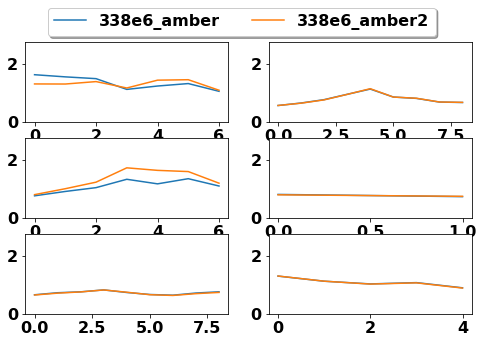

In [16]:
os.chdir('/home/boughter/m2-scratch/fab_sims')
fig, ax = pl.subplots(3, 2,squeeze=False,figsize=(8,5))
ax[0,0].plot(ab_338E6_1.values[:,0]*10); ax[1,0].plot(ab_338E6_1.values[:,1]*10); ax[2,0].plot(ab_338E6_1.values[:,2]*10)
ax[0,1].plot(ab_338E6_1.values[:,3]*10); ax[1,1].plot(ab_338E6_1.values[:,4]*10); ax[2,1].plot(ab_338E6_1.values[:,5]*10)

ax[0,0].plot(ab_338E6_2.values[:,0]*10); ax[1,0].plot(ab_338E6_2.values[:,1]*10); ax[2,0].plot(ab_338E6_2.values[:,2]*10)
ax[0,1].plot(ab_338E6_2.values[:,3]*10); ax[1,1].plot(ab_338E6_2.values[:,4]*10); ax[2,1].plot(ab_338E6_2.values[:,5]*10)

#pl.plot(fab2G02_3H*10,color='blue', linestyle='dashed', marker='s',markersize=9,markerfacecolor=[0.15,0.15,0.15])
#pl.plot(fab2G02_mut_3H*10,color='red', linestyle='solid', marker='o',markersize=10,markerfacecolor='white')

ax[0,0].set_ylim([0,2.75]); ax[1,0].set_ylim([0,2.75]); ax[2,0].set_ylim([0,2.75])
ax[0,1].set_ylim([0,2.75]); ax[1,1].set_ylim([0,2.75]); ax[2,1].set_ylim([0,2.75])

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#          ncol=3, fancybox=True, shadow=True)
#x=pl.legend(['2G02','2G02 mut','43G10','338E6','2B03','4C05'])
x=fig.legend(['338e6_amber','338e6_amber2'],loc='upper center',
          fancybox=True, shadow=True,ncol=3)#,bbox_to_anchor=(0.5, 1.3))
#pl.ylabel('RMSF (A)')
#pl.xlabel('Residue Position')
#pl.savefig('rmsf_338e6_dups.pdf',format='pdf',bbox_extra_artists=(x,),bbox_inches='tight')

# Get the averages of the files here, then plot on the slide after.

In [59]:
loop='CDR1L'
## 4C05
cdr_4c05avg=10*np.average([ab_4c05_1[loop][~np.isnan(ab_4c05_1[loop])].values,
                         ab_4c05_2[loop][~np.isnan(ab_4c05_2[loop])].values],
                        axis=0)
cdr_4c05std=10*np.std([ab_4c05_1[loop][~np.isnan(ab_4c05_1[loop])].values,
                     ab_4c05_2[loop][~np.isnan(ab_4c05_2[loop])].values],
                    axis=0)
## 3B03
cdr_3B03avg=10*np.average([ab_3B03_1[loop][~np.isnan(ab_3B03_1[loop])].values,
                         ab_3B03_2[loop][~np.isnan(ab_3B03_2[loop])].values],
                        axis=0)
cdr_3B03std=10*np.std([ab_3B03_1[loop][~np.isnan(ab_3B03_1[loop])].values,
                     ab_3B03_2[loop][~np.isnan(ab_3B03_2[loop])].values],
                    axis=0)
# 338E6
cdr_338E6avg=10*np.average([ab_338E6_1[loop][~np.isnan(ab_338E6_1[loop])].values,
                         ab_338E6_2[loop][~np.isnan(ab_338E6_2[loop])].values],
                        axis=0)
cdr_338E6std=10*np.std([ab_338E6_1[loop][~np.isnan(ab_338E6_1[loop])].values,
                     ab_338E6_2[loop][~np.isnan(ab_338E6_2[loop])].values],
                    axis=0)
## 43G10
cdr_43G10avg=10*np.average([ab_43G10_1[loop][~np.isnan(ab_43G10_1[loop])].values,
                         ab_43G10_2[loop][~np.isnan(ab_43G10_2[loop])].values],
                        axis=0)
cdr_43G10std=10*np.std([ab_43G10_1[loop][~np.isnan(ab_43G10_1[loop])].values,
                     ab_43G10_2[loop][~np.isnan(ab_43G10_2[loop])].values],
                    axis=0)
## 2G02
cdr_2G02avg=10*np.average([ab_2G02_1[loop][~np.isnan(ab_2G02_1[loop])].values,
                         ab_2G02_2[loop][~np.isnan(ab_2G02_2[loop])].values],
                        axis=0)
cdr_2G02std=10*np.std([ab_2G02_1[loop][~np.isnan(ab_2G02_1[loop])].values,
                     ab_2G02_2[loop][~np.isnan(ab_2G02_2[loop])].values],
                    axis=0)
## 2G02_mut
cdr_2G02_mutavg=10*np.average([ab_2g02_mutant_1[loop][~np.isnan(ab_2g02_mutant_1[loop])].values,
                         ab_2g02_mutant_2[loop][~np.isnan(ab_2g02_mutant_2[loop])].values],
                        axis=0)
cdr_2G02_mutstd=10*np.std([ab_2g02_mutant_1[loop][~np.isnan(ab_2g02_mutant_1[loop])].values,
                     ab_2g02_mutant_2[loop][~np.isnan(ab_2g02_mutant_2[loop])].values],
                    axis=0)

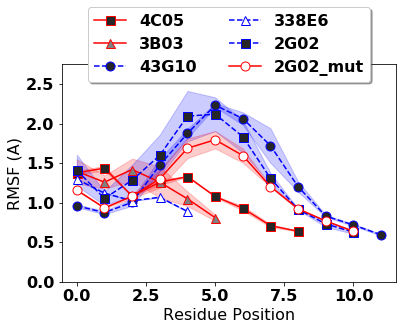

In [60]:
pl.plot(cdr_4c05avg,color='red', linestyle='solid', marker='s',markersize=9,markerfacecolor=[0.15,0.15,0.15])
pl.fill_between(np.arange(len(cdr_4c05avg)),cdr_4c05avg+cdr_4c05std,cdr_4c05avg-cdr_4c05std,color='red',alpha=0.2)

pl.plot(cdr_3B03avg,color='red', linestyle='solid', marker='^',markersize=9,markerfacecolor='gray')
pl.fill_between(np.arange(len(cdr_3B03avg)),cdr_3B03avg+cdr_3B03std,cdr_3B03avg-cdr_3B03std,color='red',alpha=0.2)

pl.plot(cdr_43G10avg,color='blue', linestyle='dashed', marker='o',markersize=9,markerfacecolor=[0.15,0.15,0.15])
pl.fill_between(np.arange(len(cdr_43G10avg)),cdr_43G10avg+cdr_43G10std,cdr_43G10avg-cdr_43G10std,color='blue',alpha=0.2)

pl.plot(cdr_338E6avg,color='blue', linestyle='dashed', marker='^',markersize=9,markerfacecolor='white')
pl.fill_between(np.arange(len(cdr_338E6avg)),cdr_338E6avg+cdr_338E6std,cdr_338E6avg-cdr_338E6std,color='blue',alpha=0.2)

pl.plot(cdr_2G02avg,color='blue', linestyle='dashed', marker='s',markersize=9,markerfacecolor=[0.15,0.15,0.15])
pl.fill_between(np.arange(len(cdr_2G02avg)),cdr_2G02avg+cdr_2G02std,cdr_2G02avg-cdr_2G02std,color='blue',alpha=0.2)

pl.plot(cdr_2G02_mutavg,color='red', linestyle='solid', marker='o',markersize=9,markerfacecolor='white')
pl.fill_between(np.arange(len(cdr_2G02_mutavg)),cdr_2G02_mutavg+cdr_2G02_mutstd,cdr_2G02_mutavg-cdr_2G02_mutstd,color='red',alpha=0.2)

pl.ylim([0,2.75])

x=pl.legend(['4C05','3B03','43G10','338E6','2G02','2G02_mut'],loc='upper center',
          fancybox=True, shadow=True,ncol=2,bbox_to_anchor=(0.5, 1.3))
#x=pl.legend(['4C05','3B03','43G10','338E6'],loc='upper center',
#          fancybox=True, shadow=True,ncol=2,bbox_to_anchor=(0.5, 1.3))
pl.ylabel('RMSF (A)')
pl.xlabel('Residue Position')
pl.savefig('CDR1L_rmsf_all.pdf',format='pdf',bbox_extra_artists=(x,), bbox_inches='tight')

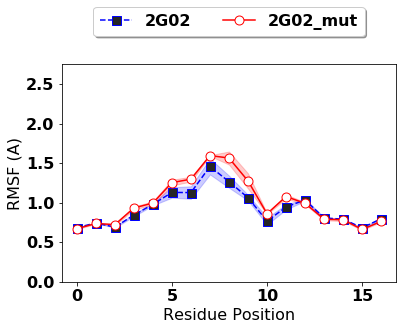

In [58]:
pl.plot(cdr_2G02avg,color='blue', linestyle='dashed', marker='s',markersize=9,markerfacecolor=[0.15,0.15,0.15])
pl.fill_between(np.arange(len(cdr_2G02avg)),cdr_2G02avg+cdr_2G02std,cdr_2G02avg-cdr_2G02std,color='blue',alpha=0.2)

pl.plot(cdr_2G02_mutavg,color='red', linestyle='solid', marker='o',markersize=9,markerfacecolor='white')
pl.fill_between(np.arange(len(cdr_2G02_mutavg)),cdr_2G02_mutavg+cdr_2G02_mutstd,cdr_2G02_mutavg-cdr_2G02_mutstd,color='red',alpha=0.2)

pl.ylim([0,2.75])

x=pl.legend(['2G02','2G02_mut'],loc='upper center',
          fancybox=True, shadow=True,ncol=2,bbox_to_anchor=(0.5, 1.3))
pl.ylabel('RMSF (A)')
pl.xlabel('Residue Position')
pl.savefig('CDR3H_rmsf_2g02.pdf',format='pdf',bbox_extra_artists=(x,), bbox_inches='tight')

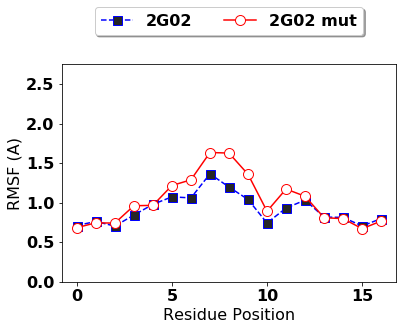

In [288]:
#pl.plot(fab43G10_3H*10,color='blue', linestyle='dashed', marker='o',markersize=10,markerfacecolor='white')
#pl.plot(fab338E6_3H*10,color='blue', linestyle='dashed', marker='^',markersize=10,markerfacecolor='gray')
pl.plot(fab2G02_3H*10,color='blue', linestyle='dashed', marker='s',markersize=9,markerfacecolor=[0.15,0.15,0.15])
pl.plot(fab2G02_mut_3H*10,color='red', linestyle='solid', marker='o',markersize=10,markerfacecolor='white')
#pl.plot(fab2b03_3H*10,color='red', linestyle='solid', marker='^',markersize=10,markerfacecolor='gray')
#pl.plot(fab4c05_3H*10,color='red', linestyle='solid', marker='s',markersize=9,markerfacecolor=[0.15,0.15,0.15])
pl.ylim([0,2.75])

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#          ncol=3, fancybox=True, shadow=True)
#x=pl.legend(['2G02','2G02 mut','43G10','338E6','2B03','4C05'])
x=pl.legend(['2G02','2G02 mut'],loc='upper center',
          fancybox=True, shadow=True,ncol=3,bbox_to_anchor=(0.5, 1.3))
pl.ylabel('RMSF (A)')
pl.xlabel('Residue Position')
pl.savefig('CDR3H_rmsf_2g02s.pdf',format='pdf',bbox_extra_artists=(x,), bbox_inches='tight')